In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [4]:
df1= pd.read_csv('data1.csv', header= None)
df4= pd.read_csv('data4.csv', header= None)

In [5]:
df1.head()

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1


In [6]:
df4.head()

,0,1,2
0,12,26,1
1,13,30,1
2,14,31,1
3,14,32,1
4,15,18,1


In [7]:
df1[2].unique()

array([ 1, -1], dtype=int64)

In [8]:
df4[2].unique()

array([1, 0], dtype=int64)

In [9]:
def chng(x):
    if x==-1:
        return 0
    return x

In [10]:
df1[2] = df1[2].apply(lambda x:chng(x))
df1[2].unique()

array([1, 0], dtype=int64)

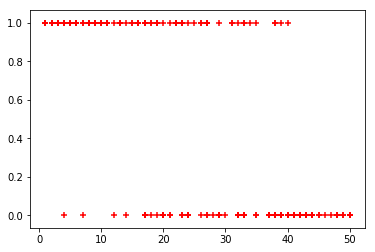

In [11]:
plt.scatter(df1[0], df1[2], marker='+', color='red')
plt.show()

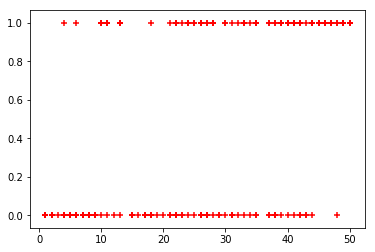

In [12]:
plt.scatter(df1[1], df1[2], marker='+', color='red')
plt.show()

In [13]:
X_train, X_test, y_train, y_test= train_test_split(df1[[0,1]], df1[2], test_size=0.2)

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
X_test.head()

,0,1
101,27,2
146,44,5
28,6,42
15,22,47
62,10,41


In [17]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [18]:
model.score(X_test, y_test)

1.0

In [20]:
y_test.head()

101    0
146    0
28     1
15     1
62     1
Name: 2, dtype: int64

In [21]:
model.predict_proba(X_test)

array([[1.00000000e+00, 1.78744087e-15],
       [1.00000000e+00, 4.82258193e-24],
       [0.00000000e+00, 1.00000000e+00],
       [4.97668573e-12, 1.00000000e+00],
       [4.44089210e-16, 1.00000000e+00],
       [1.00000000e+00, 3.32244130e-19],
       [9.99639224e-01, 3.60776314e-04],
       [9.99933633e-01, 6.63666723e-05],
       [1.00000000e+00, 3.03279023e-11],
       [1.00000000e+00, 4.99077582e-13],
       [6.03987091e-05, 9.99939601e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.02592923e-01, 8.97407077e-01],
       [9.89233260e-01, 1.07667404e-02],
       [5.27167595e-01, 4.72832405e-01],
       [1.00000000e+00, 4.38677791e-12],
       [0.00000000e+00, 1.00000000e+00],
       [9.54129168e-01, 4.58708320e-02],
       [9.99999422e-01, 5.78147455e-07],
       [9.99999941e-01, 5.85430641e-08],
       [8.84839836e-03, 9.91151602e-01],
       [1.00000000e+00, 1.09603287e-10],
       [1.81820013e-05, 9.99981818e-01],
       [9.91063364e-01, 8.93663625e-03],
       [1.000000

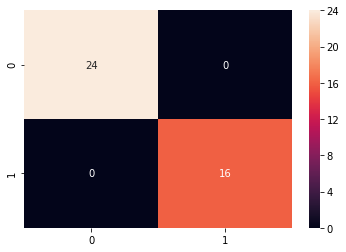

In [22]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot=True)

In [23]:
def calc(cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    pr = tp/(tp+fp)
    fm = 2*(pr*sn)/(pr+sn)
    print(f"Sensitivity is {sn}")
    print(f"Specificity is {sp}")
    print(f"Precission is {pr}")
    print(f"F_measur is {fm}")

In [24]:
calc(cm)

Sensitivity is 1.0
Specificity is 1.0
Precission is 1.0
F_measur is 1.0


In [2]:
# from sklearn.metrics import roc_curve,roc_auc_score
# tpr, fpr, threshold= roc_curve(y_test, model.predict(X_test))
# plt.plot(tpr,fpr,color='red',lw=5)
# plt.show()

In [ ]:
# Data 2:

In [26]:
X_train4, X_test4, y_train4, y_test4= train_test_split(df4[[0,1]], df4[2], test_size=0.2)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train4,y_train4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
X_test4.head()

,0,1
36,21,20
12,16,33
129,8,14
134,9,12
41,21,30


In [30]:
model.predict(X_test4)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [33]:
model.score(X_test4, y_test4)

1.0

In [34]:
y_test4.head()

36     1
12     1
129    0
134    0
41     1
Name: 2, dtype: int64

In [35]:
model.predict_proba(X_test4)

array([[0.07698783, 0.92301217],
       [0.02889911, 0.97110089],
       [0.69717722, 0.30282278],
       [0.72103514, 0.27896486],
       [0.01814752, 0.98185248],
       [0.73698008, 0.26301992],
       [0.01317068, 0.98682932],
       [0.00912249, 0.99087751],
       [0.01636918, 0.98363082],
       [0.13101692, 0.86898308],
       [0.03907287, 0.96092713],
       [0.0641378 , 0.9358622 ],
       [0.94944434, 0.05055566],
       [0.6994455 , 0.3005545 ],
       [0.00358653, 0.99641347],
       [0.69204082, 0.30795918],
       [0.16591926, 0.83408074],
       [0.01174847, 0.98825153],
       [0.89514102, 0.10485898],
       [0.18619828, 0.81380172],
       [0.76319118, 0.23680882],
       [0.83511608, 0.16488392],
       [0.7348877 , 0.2651123 ],
       [0.02199998, 0.97800002],
       [0.01377871, 0.98622129],
       [0.11839608, 0.88160392],
       [0.07872622, 0.92127378],
       [0.72801666, 0.27198334],
       [0.70674759, 0.29325241],
       [0.87639138, 0.12360862]])

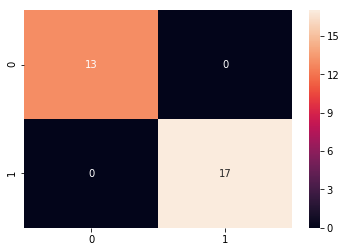

In [36]:
y_pred4 = model.predict(X_test4)
cm = confusion_matrix(y_test4, y_pred4)
sns.heatmap(cm , annot=True)

In [41]:
calc(cm)

Sensitivity is 1.0
Specificity is 1.0
Precission is 1.0
F_measur is 1.0


In [1]:
# # tpr, fpr, threshold= roc_curve(y_test4, model.predict(X_test4), drop_intermediate= False)
# tpr, fpr, threshold= roc_curve(y_test4, model.predict(X_test4))
# plt.plot(tpr,fpr,color='red',lw=5)
# plt.show()